$${\Large Лабораторная~работа~5} \\$$ 

$${\Huge Численное~решение~системы~линейных~} \\$$ 
$${\Huge ~уравнений,} \\$$ 
$${\Huge ~~ численное~интегрирование} \\$$  
$$   $$    
$$  {\normalsize  Вариант~~23  } $$  
$$   $$  
$$   $$  
$$   $$  
    
      
        
        


  
$$  {\normalsize  Работу~  выполнил~   } \\$$     
$$  {\normalsize  студент ~ радиофизического ~ факультета} \\$$   
$$  {\normalsize  430 ~ группы } \\$$    
$$  {\normalsize  Смирнов ~ Андрей} \\$$      
  
  
  

#### Содержание работы :
1. Задание
2. Цель работы
3. Вычисление интеграла
4. Решение системы
6. Вывод 

 

$\Large  \underline{№ 1} ~~ {\Large Задание} \\$ 


1.  Вычислить определенный интеграл заданным методом и с помощью функции numpy.trapz.

2. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

3. Решить систему заданным методом для 1000 уравнений (для 10000 уравнений).

4. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

5. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

  

$\Large  \underline{№ 2} ~~ {\Large Цель~работы} \\$  

Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием формулы Симпосона с относительной точностью **0,01**  
Научиться численно решать системы линейных уравнений. Решить систему из 1000 и 10000 уравнений методом прогонки и методом простой итерации с относительной точностью **0,001**.

$\Large  \underline{№ 3} ~~ Вычисление~интеграла \\$    
Вычислим определённый интеграл заданным методом с точностью 0.01 при $~i = 2$   
$${\normalsize   \int_0^1 \frac{sin(t)^2e^{-i^3t^2}}{1 + ln(t+4)(1+t)+i^2t^2cos(t)^2}~dt} \\$$   
  

$\Large  {+} ~~ Cравнение~с~методом~trapz: \\$  
Также построим графики подынтегральной функции, график значения интеграла от номера итерации и график сравнения с методом trapz 


29


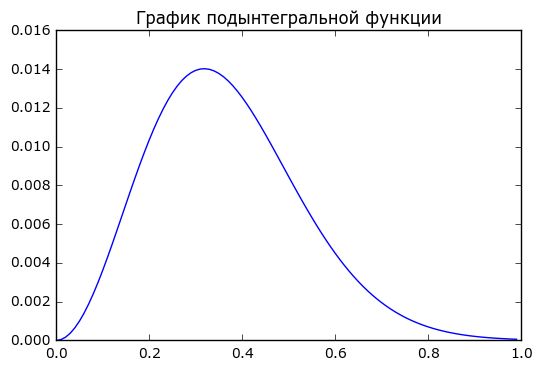

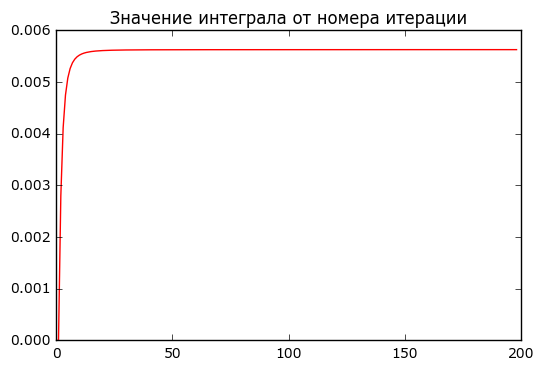

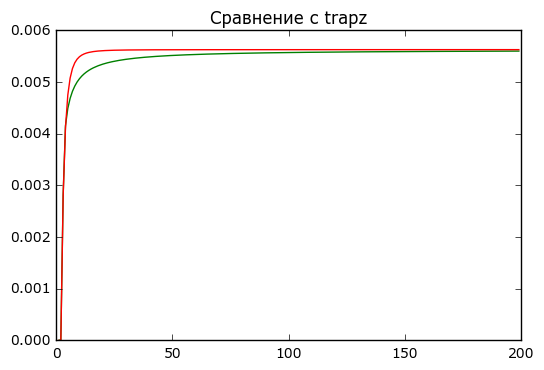

0.00560047014541  =\= 0.00562846228916


In [1]:
%matplotlib inline
import matplotlib 
matplotlib.rc('font', family='Verdana')
import numpy as np 
import matplotlib.pyplot as plt 
a = 0 
b = 1 
i = 2 
nnn = 200 

def f(t): 
    return np.sin(t)**2*np.e**(-i**3*t**2)/(1 + np.log((t+4)*(1+t)) + i*i*t*t*np.cos(t)**2) 

def sim(a,b): 
    s = (b-a)/6*(f(a) + 4 * f((b + a)/2) + f(b)) 
    return s 

ii = 0 
ysi =[] 
while 1: 
    l = 0 
    for m in range(1,ii+1): 
        h = (b-a)/(ii+1) 
        l += sim(a+m*h,a+(m+1)*h) 
    ysi.append(l) 
    if ii > 0: 
        if (ysi[-1]-ysi[-2])/ysi[-1] < 0.0001: 
            break 
    ii += 1 
    
print(ii)

x = np.arange(a,b,0.01) 
y = [f(i) for i in x] 
plt.plot (x,y) 
plt.title('График подынтегральной функции') 
plt.show() 


ytr =[] 
ysi =[] 

for j in range (1,nnn): 
    x2 = np.linspace(a,b,j) 
    y3 = [f(i) for i in x2] 
    ytr.append(np.trapz(y3, dx = (b-a)/j)) 
    l = 0
    for m in range(1,j-1): 
        h = (b-a)/j 
        l += sim(a+m*h,a+(m+1)*h) 
    ysi.append(l) 

plt.plot(range(0,len(ysi)),ysi,c = 'r') # значение интеграла от номера итерации 
plt.title('Значение интеграла от номера итерации') 
plt.show() 
#доп 
plt.plot(range(1,nnn),ytr,c = 'g') 
plt.plot(range(1,nnn),ysi,c = 'r') 
plt.title('Сравнение с trapz') 
plt.show() 
print (ytr[-1],' =\=' ,ysi[-1])

$\Large  \underline{№ 4} ~~ Решение~системы \\$    
Решить для n = 10000 $\underline{методом~прогонки}~и~\underline{методом~простой~итерации}$  систему уравнений
  
$$\begin{cases}
   x_1 = 1 \\
  x_{i-1} -~(5 + sin(i)^5cos(i)^2/(i^2 + 1 ))~x_i + (1 + sin(i)^2)~x_{i+1} =~-2~+~\int_0^1 \frac{sin(t)^2e^{-i^3t^2}}{1 + ln(t+4)(1+t)+i^2t^2cos(t)^2}~d \\
  x_n = 0.1 * x_{n-1}
 \end{cases}$$
 
Для вычисления интеграла с относительной точностью 0.01 использовать формулу Симпсона 
Относительная точность метода простой итерации - 0.01


## Метод прогонки 

Важным классом систем явлются системы вида:

$~~~~~ d_1x_1 + c_1x_2 = b_1,$    
$~~~~~  a_ix_{i-1}+d_ix_i + c_ix_{i+1} = b_i, ~~~~~~ i =2,3,...,n-1 ~~~~~~~~~~~~~~~~~~~~ (1)$   
$~~~~~  a_nx_{n-1}+d_nx_n = b_n $   
  
с трёхдигональной матрицей

$$  A ~ = ~ \left[
  \begin{array}{ccc}
  d_1 & c_1 & 0 & 0 & ... & ... & 0 & 0  \\
  a_2 & d_2 & c_2 & 0 & ... & ... & 0 & 0    \\
   ... & ... & ... & ... & ... & ... & ... & ...    \\
  0 & 0 & ... & ... & 0 & a_{n-1} & d_{n-1} & c_{n-1}  \\
  0 & 0 & ... & ... & 0 & 0 & a_n & d_n    \\
  \end{array}
\right] $$

Такие системы возникают при решении краевых задач для дифференциальных уравнений разностными методами.  
$~~$Специальный вид матрицы А позволяет примнить идею исключения неизвестных в системе (1)  следующим способом,который носит название $\underline{метода~прогонки}$ .   
$~~$Первое уравнение системы (1) дает соотношение между $x_1$ и $x_2$,в силу которого второе уравнение даёт соотношение между $x_2$ и $x_3$.Следовательно,третье уравнение даёт соотншение между $x_3$ и $x_4$ и т.д.
Запишем связь между неизвестными $x_i-1$ и $x_i$ в виде:    
  
$$x_{i-1} = L_ix_i + M_i,~~~~ i = 2,3,...,n.   ~~~~~ (2)$$

Из первого уравнения системы (1) следует ,что  

$$ L_2 = - \frac{c_1}d_1 , ~~~~ M_2 = - \frac{b_1}d_1   ~~~~~ (3)$$

Подставляя (2) в i-ое уравнение системы (1),получим

$$x_i = -\frac{c_i}{a_iL_i+d_i}x_{i+1} + \frac{b_i - M_ia_i}{a_iL_i+d_i} ~~~~~~ (4)$$

Сравнивая (2) и (4) ,надим рекуррентные соотношения 

$$L_{i+1} = -\frac{c_i}{a_iL_i+d_i}~,~~~~~ M_{i+1} = -\frac{b_i - M_ia_i}{a_iL_i+d_i}~, ~~~~~ i = 2,...,n-1$$
которые вместе с формулами (3) позволяют последовательно найти все прогоночные коэффициенты.Процесс нахожения этих коэффициентов называется прямым ходом метода прогонки.Из последнего уравнения системы (1) и соотношения (5) для i =n находим 

$$ x_n = \frac{b_n - M_na_n}{a_nL_n+d_n} $$

что позволяет по формулам (2) последовательно найти все остальные неизвестные $x_{n-1}$, $x_{n-2}$,...,$x_{1}$ (обратный ход метода прогонки).



$\Large  {Реализация~метода~прогонки} \\$    

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.linalg as la
a = 0 
b = 10 
n = 10000
eint = 0.01

def f(t): 
    return np.sin(t)**2*np.e**(-i**3*t**2)/(1 + np.log((t+4)*(1+t)) + i*i*t*t*np.cos(t)**2) 

def sim(a,b): 
    s = (b-a)/6*(f(a) + 4 * f((b + a)/2) + f(b)) 
    return s 

A = np.zeros((n,n))
F = np.zeros(n)

for i in range(1,n):
    A[i-1][i - 2] = 1
    A[i-1][i-1] = - (5 + np.sin(i)**5*np.cos(i)**2/(i*i + 1))
    A[i-1][i] = (1 + np.sin(i)**2)
    F[i] = - 2

A[0][:] = 0              
A[0][0] = 1
A[-1][-1] = 1
A[-1][-2] = -0.1
F[0] = 1 
F[-1] = 2

flag = 0

for i in range(2,n):
    ii = 0 
    prev = 0
    curr = 0
    while (flag!=1):
        l = 0 
        prev = curr
        for m in range(1,ii+1): 
            h = (b-a)/(ii+1) 
            l += sim(a+m*h,a+(m+1)*h)
        curr = l
        if ii > 0: 
            if (curr-prev)/curr < eint:
                if curr > 0.0000001:    
                    F[i-1] = -2 + curr
                else: 
                    flag = 1
                break 
        ii += 1 
F[0] = 1
F[-1] = 2
        
d = np.ones(n)
a = np.zeros(n-1)
c = np.ones(n-1)
L = np.zeros(n-1)
M = np.zeros(n)
g = np.zeros(n+1)


g[0] = A[0][0]
L[0] = - A[0][1] / A[0][0]
M[0] = F[0] / A[0][0]

for i in range(0,n):
    d[i]= A[i][i]
    if (i<n-1):
        c[i]= A[i][i+1]
    if (i>0):
        a[i-1] = A[i][i-1] 

for i in range(1,n):
        g[i] = a[i-1] * L[i-1] + d[i]
        if(i<n-1):
            L[i] = - c[i] / g[i]
        M[i] = (F[i] - M[i-1]*a[i-1])/ g[i]
        

print("input and calculation of coefficients  successfully completed")      

C:\Users\Андрей\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


input and calculation of coefficients  successfully completed


 $\Large  ~~ Зависимости \\$    
  
Построим график решения X(i),а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы 
Решим систему с помощью функции numpy.linalg.solve(...).Сравним результаты графически.

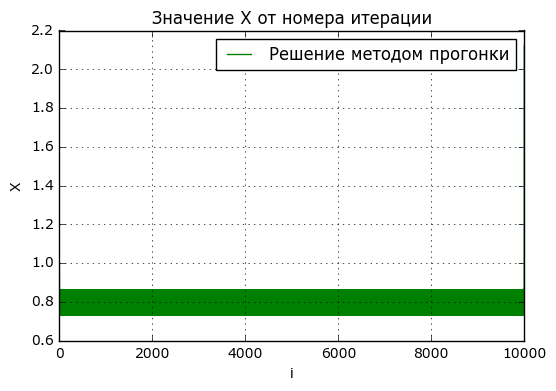

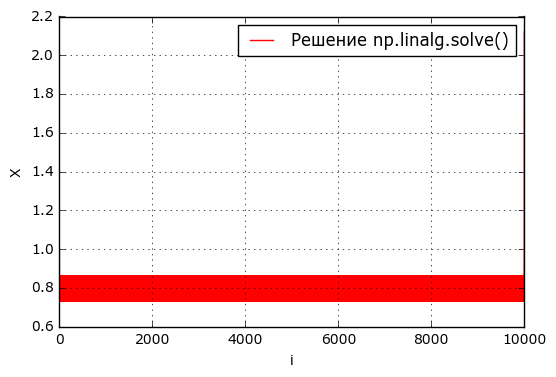

Сравним нормы векторов решения способом прогонки и встроенной функции linalg.solve:

Норма вектора X встроенного решения =   79.8531416559602
Норма вектора Х метода прогонки =  79.85314165596019

Нормы совпадают!!!!


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('font', family='Verdana')

X_progonka = np.zeros(n)

X_progonka[-1] = M[-1]

for m in range(len(X_progonka)-2,0,-1):
    X_progonka[m] = L[m]*X_progonka[m+1] + M[m]

X_progonka[0] = 1             
X_progonka[-1] = 0.1*X_progonka[-2] + 2
        
X_LinalgSolve = np.linalg.solve(A,F) 

t = np.arange(0,n)


plt.grid(True)
plt.title('Значение X от номера итерации')
plt.ylabel('Х')
plt.xlabel('i')
plt.plot(t,X_progonka,label = "Решение методом прогонки",c = 'g')
plt.legend(loc = 'best')
plt.show()


plt.grid(True)
#plt.title('Значение X от номера итерации')
plt.ylabel('Х')
plt.xlabel('i')
plt.plot(t,X_LinalgSolve,label = "Решение np.linalg.solve()",c = 'r')
plt.legend(loc = 'best')
plt.show()

print("Сравним нормы векторов решения способом прогонки и встроенной функции linalg.solve:")
print("") 
print("Норма вектора X встроенного решения =  ",la.norm(X_LinalgSolve))
print("Норма вектора Х метода прогонки = ",la.norm(X_progonka))
print("") 
print("Нормы совпадают!!!!")



## Метод простой итерации 

Требуется решить систему вида:
$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 +...+ a_{1n}x_n & = & b_1  \\
a_{21}x_1 + a_{22}x_2 +...+ a_{2n}x_n & = & b_2\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1}x_1 + a_{n2}x_2 +...+ a_{nn}x_n & = & b_n\\
\end{cases}
$$
##### Метод решения:
Решив 1-ое уравнение системы относительно x1 получим:$$x_1 = \frac{b_1-(a_{11}x_1 + a_{12}x_2 +...+ a_{1n}x_n)}{a_{11}}$$
2-ое - относительно x2 , n-ое - относительно xn. 
В итоге эквивалентная система, в которой диагональные элементы строки выражены через оставщиеся:
$$ x = \alpha x+\beta$$
$$\alpha = \begin{pmatrix}
0 & -\frac{a_{12}}{a_{11}} & \cdots & -\frac{a_{1n}}{a_{11}} \\
-\frac{a_{21}}{a_{22}} & 0 & \cdots & -\frac{a_{2n}}{a_{22}} \\         
\vdots & \vdots & \ddots & \vdots \\
-\frac{a_{1n}}{a_{nn}} & -\frac{a_{2n}}{a_{nn}} & \cdots & 0
\end{pmatrix}
$$
$$
\beta = \begin{pmatrix}
b_{1}  \\
b_{2}  \\         
.  \\
b_{n}
\end{pmatrix}
$$
Далее вводится некоторое начальное приближение - вектор x(0), затем используя x(1) находится x(2).
 Данный процесс называется итерационным, условием окончания является достижение заданной точности (система сходится и есть решение) или прерывание процесса. Процесс прерывается когда число итераций превышает заданное допустимое количество, при этом система не сходится либо заданное количество итераций не хватило для достижения требуемой точности. 
 

$\Large  {Реализация~метода~простой~итерации} \\$    

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.linalg as la

a = 0 
b = 10 
n = 10000
eint = 0.01

def f(t): 
    return np.sin(t)**2*np.e**(-i**3*t**2)/(1 + np.log((t+4)*(1+t)) + i*i*t*t*np.cos(t)**2) 

def sim(a,b): 
    s = (b-a)/6*(f(a) + 4 * f((b + a)/2) + f(b)) 
    return s 

A = np.zeros((n,n))
F = np.zeros(n)

for i in range(1,n):
    A[i-1][i - 2] = 1
    A[i-1][i-1] = - (5 + np.sin(i)**5*np.cos(i)**2/(i*i + 1))
    A[i-1][i] = (1 + np.sin(i)**2)
    F[i] = - 2

A[0][:] = 0              
A[0][0] = 1
A[-1][-1] = 1
A[-1][-2] = -0.1
F[0] = 1 
F[-1] = 2

flag = 0

for i in range(2,n):
    ii = 0 
    prev = 0
    curr = 0
    while (flag!=1):
        l = 0 
        prev = curr
        for m in range(1,ii+1): 
            h = (b-a)/(ii+1) 
            l += sim(a+m*h,a+(m+1)*h)
        curr = l
        if ii > 0: 
            if (curr-prev)/curr < eint:
                if curr > 0.0000001:    
                    F[i-1] = -2 + curr
                else: 
                    flag = 1
                break 
        ii += 1 
F[0] = 1
F[-1] = 2


print("input successfully completed")    

C:\Users\Андрей\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: invalid value encountered in double_scalars


input successfully completed


Number of method iterations :  11
Norm vector :  [45.05702476055371, 62.59332647090951, 71.28442533424176, 75.59896248035984, 77.74115121816868, 78.80378100897134, 79.3312477663493, 79.59296568082547, 79.72284955394034, 79.78730268192881, 79.81928745051665]


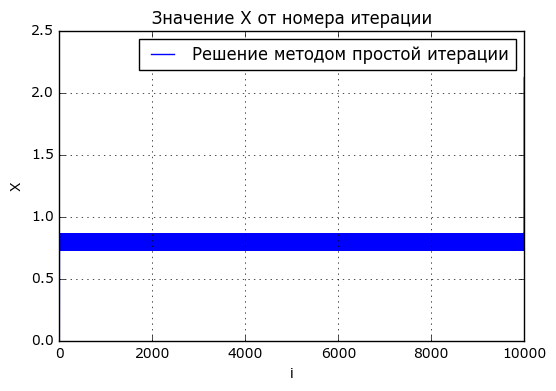

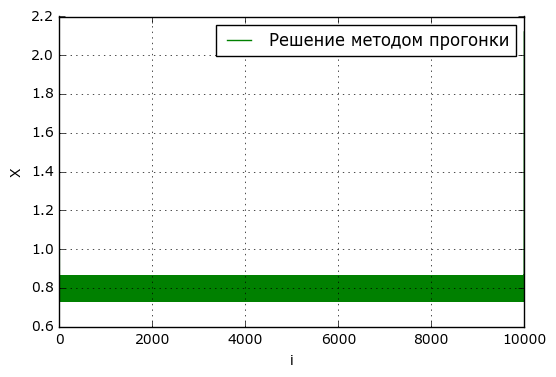

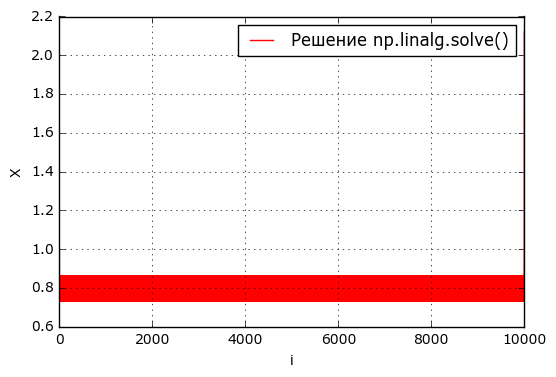

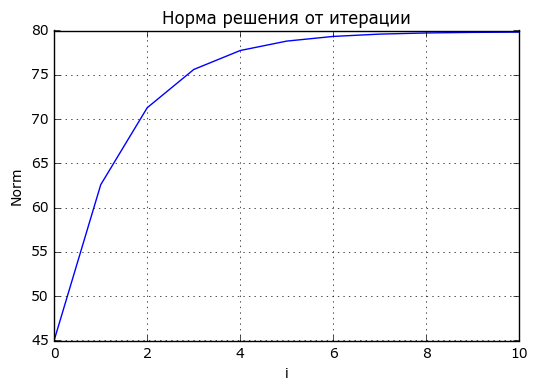

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('font', family='Verdana')

e = 0.001                 # precision of calculations
F_sh = np.zeros(n)        # recalculated F
A_sh = np.zeros((n,n))    # recalculated A
my_norm = []              # norm vector  X(i)


for l in range (0,n):                      # line  
    for c in range (0,n):                  # column
        A_sh[l][c] = -A[l][c] / A[l][l]
        F_sh[l] = F[l]/A[l][l]
    A_sh[l][l] += 1                        # diagonal element check (must be equals 0)
    
X = 0.1*np.ones(n) 
X_sh = np.zeros(n)

i = 0 


while 1>0:      # Solving
    i += 1
    X_sh = X
    X = np.dot(A_sh,X) + F_sh
    my_norm.append(la.norm(X))
    X[0] = 0.1
    X_sh[0] = 0.1
    
    if all(abs(X - X_sh) / X < e):
        X[0] = 0
        break
        

X_LinalgSolve = np.linalg.solve(A,F)

z = np.arange(0,i)
t = np.arange(0,n)

print('Number of method iterations : ', i)
print("Norm vector : ", my_norm)

plt.grid(True)
plt.title('Значение X от номера итерации')
plt.ylabel('Х')
plt.xlabel('i')
plt.plot(t,X,label = "Решение методом простой итерации",c = 'b')
plt.legend(loc = 'best')
plt.show()


plt.grid(True)
#plt.title('Значение X от номера итерации ')
plt.ylabel('Х')
plt.xlabel('i')
plt.plot(t,X_progonka,label = "Решение методом прогонки",c = 'g')
plt.legend(loc = 'best')
plt.show()

plt.grid(True)
#plt.title('Значение X от номера итерации ')
plt.ylabel('Х')
plt.xlabel('i')
plt.plot(t,X_LinalgSolve,label = "Решение np.linalg.solve()",c = 'r')
plt.legend(loc = 'best')
plt.show()

plt.grid(True)
plt.title('Норма решения от итерации')
plt.ylabel('Norm')
plt.xlabel('i')
plt.plot(z,my_norm)
plt.show()



Вывод о полученных зависимостях сформулирован в пункте 5 (Вывод)

$\Large  \underline{№ 5} ~~ Вывод~: \\$    
 
* Значения интегралов, вычесленных с помощью встроенной функции и формулы Симпсона, совпадают с точностью до 5 знака после запятой(при большом номере итераций).
* Решение системы методами прогонки и простой итерации совпадают с решением встроенной функцией
* Нормы векторов прогонки и встроенного метода решений также совпадают
* Были изучены и реализованны практически методы решений СЛУ
